In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def plot_potential(potential_scalar_field, min_grid=-4, max_grid=4, level_min=-1, level_max=4, num_levels=12):
    # Generate coordinates for plotting
    x = np.linspace(min_grid, max_grid, 100)
    y = np.linspace(min_grid, max_grid, 100)
    X, Y = np.meshgrid(x, y)

    # Calculate potential energy values
    Z = potential_scalar_field(X, Y)

    # Define discrete levels for contour plot
    levels = np.linspace(level_min, level_max, num_levels)

    # Plotting the contour plot with reversed colors on a blue-red scale
    cmap = plt.cm.RdBu_r
    norm = plt.Normalize(vmin=level_min, vmax=level_max)
    cmap.set_over(color='white')  

    plt.contourf(X, Y, Z, levels=levels, cmap=cmap, norm=norm, extend='both')
    plt.colorbar(label='Potential Energy')
    plt.title('Potential')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.show()


def plot_potential_and_diffusion(potential_scalar_field, diffusion_matrix_field, min_grid=-4, max_grid=4, level_min=-1, level_max=4, num_levels=12, diff_min=-4, diff_max=4, diff_scale=15, diff_levels=10):
    # Generate coordinates for plotting
    x = np.linspace(min_grid, max_grid, 100)
    y = np.linspace(min_grid, max_grid, 100)
    X, Y = np.meshgrid(x, y)

    # Calculate potential energy values
    Z = potential_scalar_field(X, Y)

    # Define discrete levels for contour plot
    levels = np.linspace(level_min, level_max, num_levels)

    # Plotting the contour plot with reversed colors on a blue-red scale
    cmap = plt.cm.RdBu_r
    norm = plt.Normalize(vmin=-1, vmax=4)
    cmap.set_over(color='white')  

    plt.contourf(X, Y, Z, levels=levels, cmap=cmap, norm=norm, extend='both')
    plt.colorbar(label='Potential Energy')
    plt.title('Potential Energy Landscape')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Subsample the grid for plotting the eigenvectors
    x = np.linspace(diff_min, diff_max, diff_levels)
    y = np.linspace(diff_min, diff_max, diff_levels)
    X, Y = np.meshgrid(x, y)

    # Calculate the eigenvalues and eigenvectors of the matrix field at each point
    dx = np.zeros((len(x), len(y)))
    dy = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            dx[i, j] = np.sqrt((diffusion_matrix_field(x[i], y[j])[0, 0])**2 + (diffusion_matrix_field(x[i], y[j])[0, 1])**2)
            dy[i, j] = np.sqrt((diffusion_matrix_field(x[i], y[j])[1, 0])**2 + (diffusion_matrix_field(x[i], y[j])[1, 1])**2)

    # Plot the eigenvectors scaled by eigenvalues
    plt.quiver(Y, X, dx, 0, scale=diff_scale, color='b', label='Eigenvalue 1')
    plt.quiver(Y, X, 0, dy, scale=diff_scale, color='r', label='Eigenvalue 2')
    plt.quiver(Y, X, - dx, 0, scale=diff_scale, color='b')
    plt.quiver(Y, X, 0, -dy, scale=diff_scale, color='r')

    plt.show()

### 1. Quadruple Well Potential 2D

#### 1.1 Potential

$$ 
V(x, y) = \sqrt{\frac{17}{16} - 2x^2 + x^4} + \sqrt{\frac{17}{16} - 2y^2 + y^4}
$$

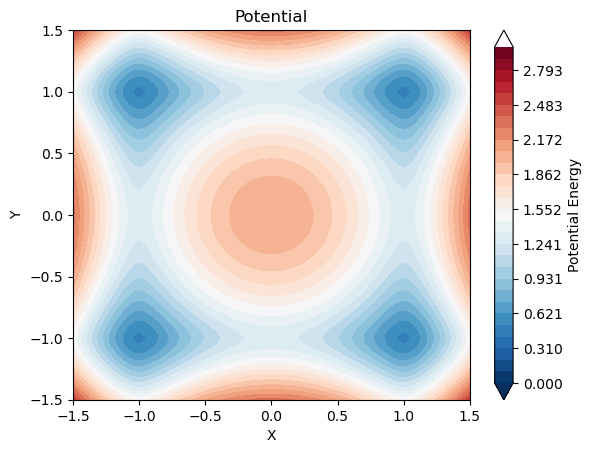

In [31]:
def quadruple_well_potential(x, y):
    return np.sqrt(17/16 - 2*x**2 + x**4) + np.sqrt(17/16 - 2*y**2 + y**4)

plot_potential(quadruple_well_potential, min_grid=-1.5, max_grid=1.5, level_min=0, level_max=3, num_levels=30)

#### 1.2 Isotropic (Moro-Cardin Diffusion)

$$
D(x, y) = \frac{1}{1 + 5e^{- \frac{x^2 + y^2}{0.18}}} \mathbf{1}_{2 \times 2}
$$

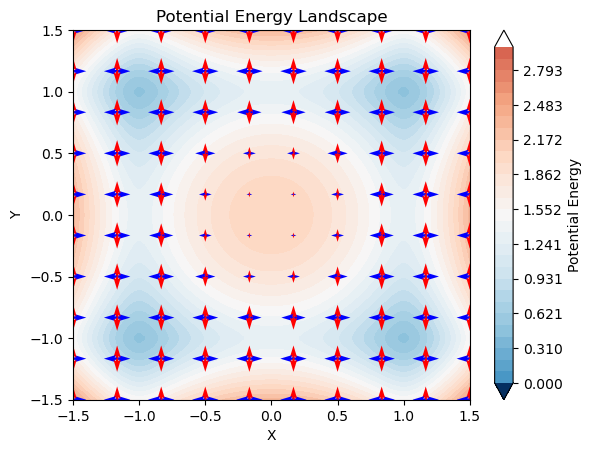

In [38]:
def isotropic_MoroCardin_diffusion_field(x, y):
    return 1/(1.0 + 5.0 * np.exp(- (x**2 + y**2) / (2 * 0.3**2))) * np.array([[1, 0], [0, 1]])

plot_potential_and_diffusion(quadruple_well_potential, isotropic_MoroCardin_diffusion_field, min_grid=-1.5, max_grid=1.5, level_min=0, level_max=3, num_levels=30, diff_min=-1.5, diff_max=1.5, diff_scale=30)

### 1.3 Anisotropic I

$$
D(x, y) = \begin{bmatrix}
1 & 0 \\
0 & 2
\end{bmatrix}
$$

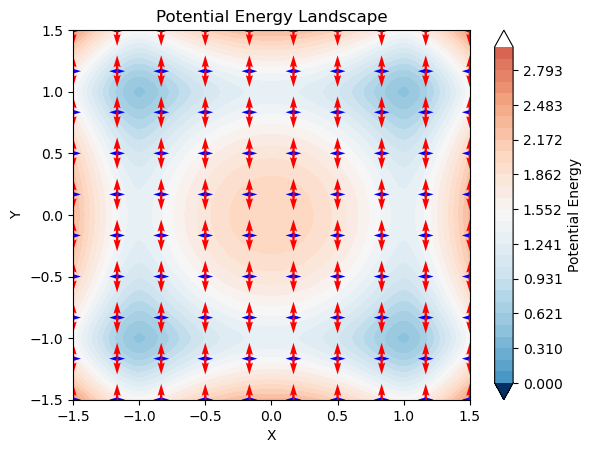

In [67]:
def basic_anisotropic_diffusion_field(x, y):
    return np.array([[1, 0], [0, 2]])

plot_potential_and_diffusion(quadruple_well_potential, basic_anisotropic_diffusion_field, min_grid=-1.5, max_grid=1.5, level_min=0, level_max=3, num_levels=30, diff_min=-1.5, diff_max=1.5, diff_scale=50)

#### 1.3 Anisotropic II

$$

D(r, \theta) = \begin{bmatrix}
1 - \sin(\theta)^2 / 2 & \cos(\theta) \sin(\theta) / 2 \\
\cos(\theta) \sin(\theta) / 2 & 1 - \cos(\theta)^2 / 2
\end{bmatrix}
$$

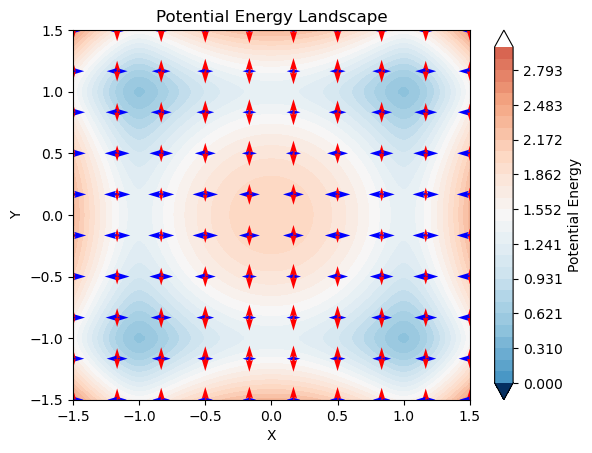

In [61]:
def anisotropic_diffusion_field(x, y):
    theta = np.arctan2(y, x)
    matrix = np.array([[1-np.sin(theta)**2 / 2, np.cos(theta) * np.sin(theta) / 2],
                       [np.cos(theta) * np.sin(theta)/2, 1 - np.cos(theta)**2 / 2]])
    return matrix

plot_potential_and_diffusion(quadruple_well_potential, anisotropic_diffusion_field, min_grid=-1.5, max_grid=1.5, level_min=0, level_max=3, num_levels=30, diff_min=-1.5, diff_max=1.5, diff_scale=30)

#### 1.4 Anisotropic III (Moro-Cardin + Anisotropic II)

$$

D(x, y) = \frac{1}{1 + 5e^{- \frac{x^2 + y^2}{0.18}}} \begin{bmatrix}
1 - \sin(\theta)^2 / 2 & \cos(\theta) \sin(\theta) / 2 \\
\cos(\theta) \sin(\theta) / 2 & 1 - \cos(\theta)^2 / 2
\end{bmatrix}

$$

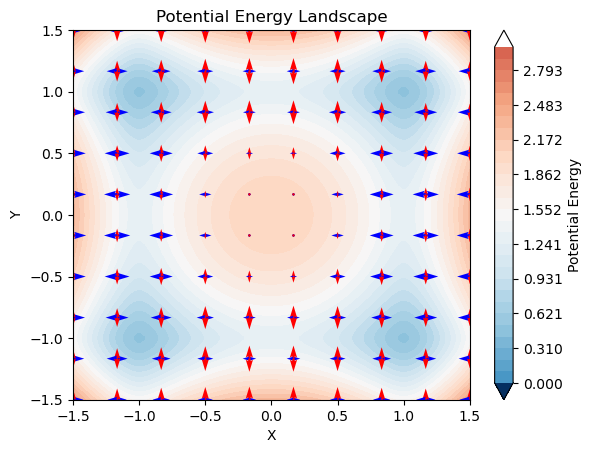

In [41]:
def anisotropic_morocardin_diffusion_field(x, y):
    theta = np.arctan2(y, x)
    factor = 1.0 + 5.0 * np.exp(- (x**2 + y**2) / (2 * 0.3**2))
    matrix = np.array([[1-np.sin(theta)**2 / 2, np.cos(theta) * np.sin(theta) / 2],
                       [np.cos(theta) * np.sin(theta)/2, 1 - np.cos(theta)**2 / 2]])
    return matrix / factor

plot_potential_and_diffusion(quadruple_well_potential, anisotropic_morocardin_diffusion_field, min_grid=-1.5, max_grid=1.5, level_min=0, level_max=3, num_levels=30, diff_min=-1.5, diff_max=1.5, diff_scale=30)

### 2. Double-Well Entropic Channel 2D

#### 2.1 Potential

$$
V(x, y) = \frac{25y^2}{25x^2 + 1} + \frac{1}{6} \left( \sqrt{4(1-x^2 - y^2)^2 + 2(x^2 - 2)^2 + ((x+y)^2 -1)^2 + ((x-y)^2 -1)^2} - 2 \right)
$$

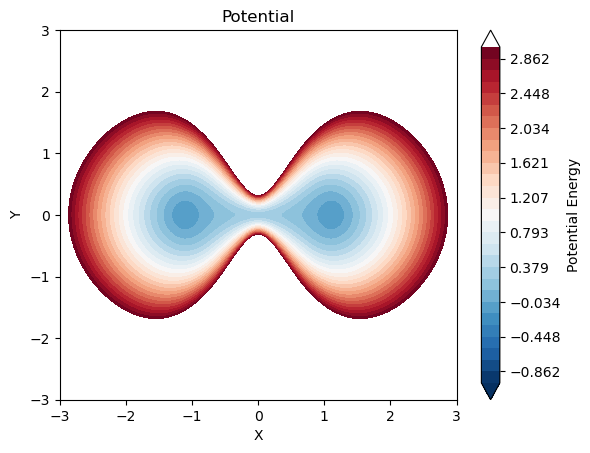

In [44]:
def potential_energy(x, y):
    term1 = (5*y)**2  / ((5*x)**2 + 1)
    term2 = (1/6) * (np.sqrt(4 * (1-x**2 - y**2)**2 + 2*(x**2 - 2)**2 + ((x+y)**2 -1)**2 +((x-y)**2 -1)**2) -2)
    return term1 + term2

plot_potential(potential_energy, min_grid=-3, max_grid=3, level_min=-1, level_max=3, num_levels=30)

#### 2.2 Isotropic (Moro-Cardin Diffusion)

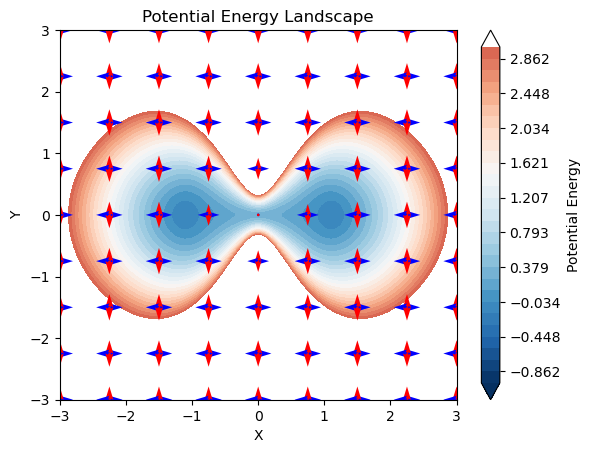

In [54]:
plot_potential_and_diffusion(potential_energy, isotropic_MoroCardin_diffusion_field, min_grid=-3, max_grid=3, level_min=-1, level_max=3, num_levels=30, diff_min=-3, diff_max=3, diff_scale=30, diff_levels=9)

#### 2.3 Anisotropic I

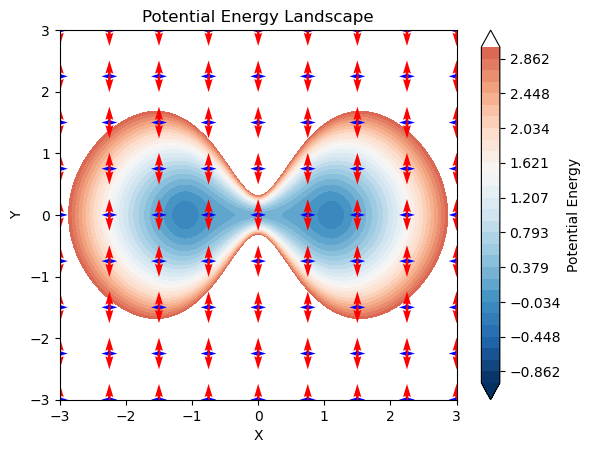

In [69]:
plot_potential_and_diffusion(potential_energy, basic_anisotropic_diffusion_field, min_grid=-3, max_grid=3, level_min=-1, level_max=3, num_levels=30, diff_min=-3, diff_max=3, diff_scale=50, diff_levels=9)

#### 2.4 Anisotropic II

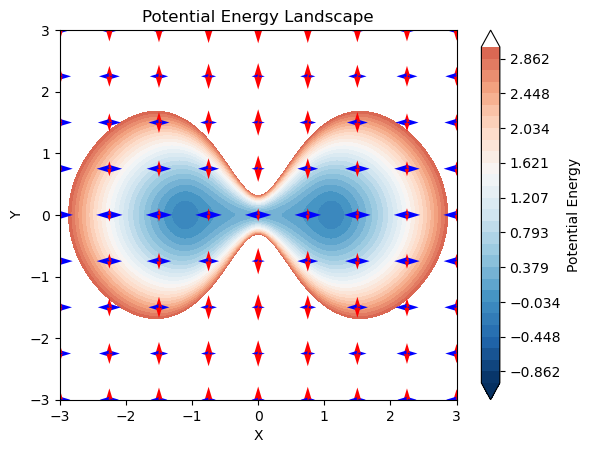

In [62]:
plot_potential_and_diffusion(potential_energy, anisotropic_diffusion_field, min_grid=-3, max_grid=3, level_min=-1, level_max=3, num_levels=30, diff_min=-3, diff_max=3, diff_scale=30, diff_levels=9)

#### 2.3 Anisotropic III

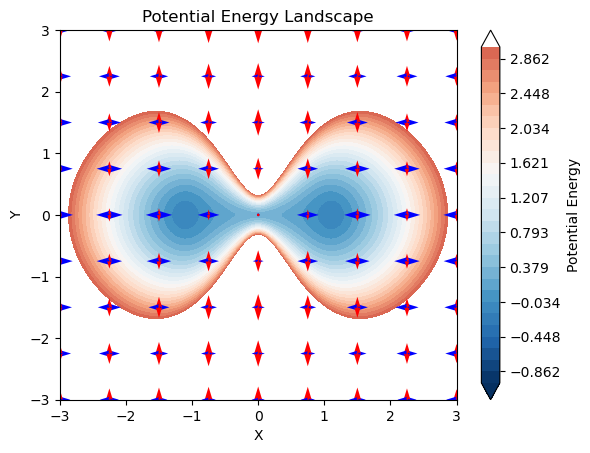

In [56]:
plot_potential_and_diffusion(potential_energy, anisotropic_morocardin_diffusion_field, min_grid=-3, max_grid=3, level_min=-1, level_max=3, num_levels=30, diff_min=-3, diff_max=3, diff_scale=30, diff_levels=9)

#### 2.3 Anisotropic IV (Barrier-Hopping Diffusion)

$$
D(x, y) = \begin{bmatrix}
\frac{\max(2 - V(x,y), 1)}{1 + \min(\lvert V_{xx}(x,y) \rvert, 5)} & 0 \\
0 & \frac{\max(2 - V(x,y), 1)}{1 + \min(\lvert V_{yy}(x,y) \rvert, 5)}
\end{bmatrix}
$$

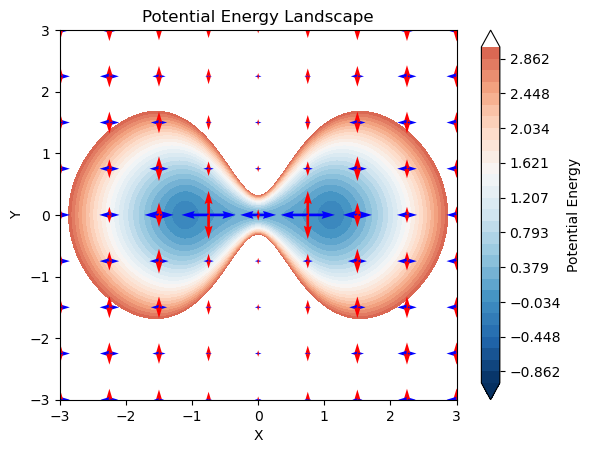

In [60]:
def second_partial_y_derivative(x, y):
    result = 10 / (1 + 25 * x**2) + (np.sqrt(2) * (20 * x**6 + 2 * x**4 * (-31 + 18 * y**2) + 5 * x**2 * (13 - 18 * y**2 + 9 * y**4) + 3 * (-7 + 21 * y**2 - 9 * y**4 + 3 * y**6))) / (3 * (7 + 4 * x**4 - 6 * y**2 + 3 * y**4 + 10 * x**2 * (-1 + y**2))**(3/2))
    return result

def second_partial_x_derivative(x, y):
    term1 = (250 * (-1 + 75 * x**2) * y**2) / (1 + 25 * x**2)**3
    term2 = (np.sqrt(2) * (16 * x**6 + 60 * x**4 * (-1 + y**2) + 12 * x**2 * (7 - 6 * y**2 + 3 * y**4) + 5 * (-7 + 13 * y**2 - 9 * y**4 + 3 * y**6))) / (3 * (7 + 4 * x**4 - 6 * y**2 + 3 * y**4 + 10 * x**2 * (-1 + y**2))**(3/2))
    
    result = term1 + term2
    return result

def first_partial_y_derivative(x, y):
    term1 = (10 * y) / (1 + 25 * x**2)
    term2 = (np.sqrt(2) * y * (-3 + 5 * x**2 + 3 * y**2)) / (3 * np.sqrt(7 + 4 * x**4 - 6 * y**2 + 3 * y**4 + 10 * x**2 * (-1 + y**2)))
    
    result = term1 + term2
    return result

def first_partial_x_derivative(x, y):
    term1 = -(250 * x * y**2) / (1 + 25 * x**2)**2
    term2 = (np.sqrt(2) * x * (-5 + 4 * x**2 + 5 * y**2)) / (3 * np.sqrt(7 + 4 * x**4 - 6 * y**2 + 3 * y**4 + 10 * x**2 * (-1 + y**2)))
    
    result = term1 + term2
    return result

def anisotropic_diffusion_field(x, y):
    matrix = np.array([[max(2 - potential_energy(x, y), 1)/(1+min(np.abs(second_partial_x_derivative(x,y)), 5)), 0],
                       [0, max(2 - potential_energy(x, y), 1)/(1+min(np.abs(second_partial_y_derivative(x,y)), 5))]])
    return matrix

plot_potential_and_diffusion(potential_energy, anisotropic_diffusion_field, min_grid=-3, max_grid=3, level_min=-1, level_max=3, num_levels=30, diff_min=-3, diff_max=3, diff_scale=20, diff_levels=9)